## Info

Kód algoritmu se nachází v `algorithms.py`.

Scatter plot: <span style="color:green">Zelené</span> tečky na grafech ukazují počáteční hodnoty algoritmů, černé ukazují postup a <span style="color:red">červené</span> ukazují nejlepší výsledek.

Obsah:
1. Importy
2. Konfigurace (vzdálenosti, funkce, "surface" body funkcí)
3. Differential evolution
4. Differential evolution - dodatečný graf

## Imports

In [7]:
# Imports

import numpy as np
from matplotlib import pyplot
import functions, classes, algorithms                       # custom classes and functions
import multiprocessing                                      # for multithreaded applications
from IPython.core.display import HTML                       # for HTML video inline output
import matplotlib.patches as mpatches
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap

## Imports - interactive plot

In [8]:
# Requires tkinter!

interactive = False

if interactive == True:
    import matplotlib
    matplotlib.use('TkAgg')
    interactive = True

## Configuration

In [9]:
# Ranges - grid
range_min: float = -6.0
range_max: float = 6.0

# Points in given range
point_spacing: float = 0.01
raw_points_x_axis: list = np.arange(range_min, range_max, point_spacing)
raw_points_y_axis: list = np.arange(range_min, range_max, point_spacing)

# Create meshgrid - matrices from X and Y points
points_x_axis, points_y_axis = np.meshgrid(raw_points_x_axis, raw_points_y_axis)

# Generate Z coordinate from given function (visit functions.py)
function: function = functions.ackley
points_z_axis: list = function(points_x_axis, points_y_axis)

# Initialize configuration
config: classes.DEConfiguration = classes.DEConfiguration(
    range_min=range_min,
    range_max=range_max,
    point_spacing=point_spacing,
    function=function,
    surface_x=points_x_axis,
    surface_y=points_y_axis,
    surface_z=points_z_axis,
    surface_z_min=np.min(points_z_axis)
)

## Differential evolution

[ALGO] Best result after 50 generations and population size 20: 7.792863915057069e-06


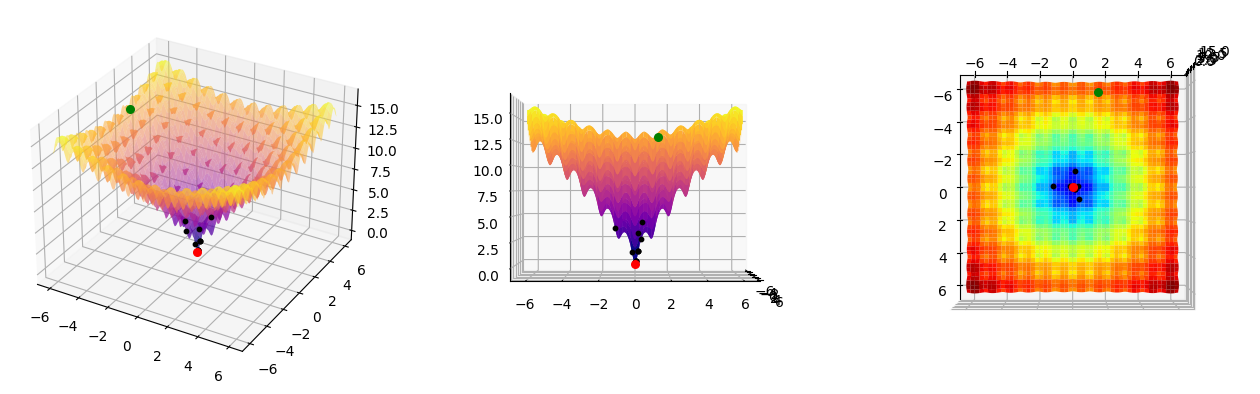

In [10]:
# Initialize plot
plot_1: classes.PlotNonInteractive = classes.PlotNonInteractive(config=config, name="Differential evolution", interactive=interactive)

# Perform algo
de_best, de_all, de_start = algorithms.differential_evolution(
    config=config,
    population_size=20,
    iterations=50,
    mutation_rate=0.5,
    crossover_rate=0.5
)

# Add points into plot
plot_1.add_point(de_start, 'green', 30, 3)                          # Render starting point
for point in de_all: plot_1.add_point(point, 'black', 10, 2)        # Render progress points
plot_1.add_point(de_best, 'red', 30, 3)                             # Render best point

## Differential evolution - chart

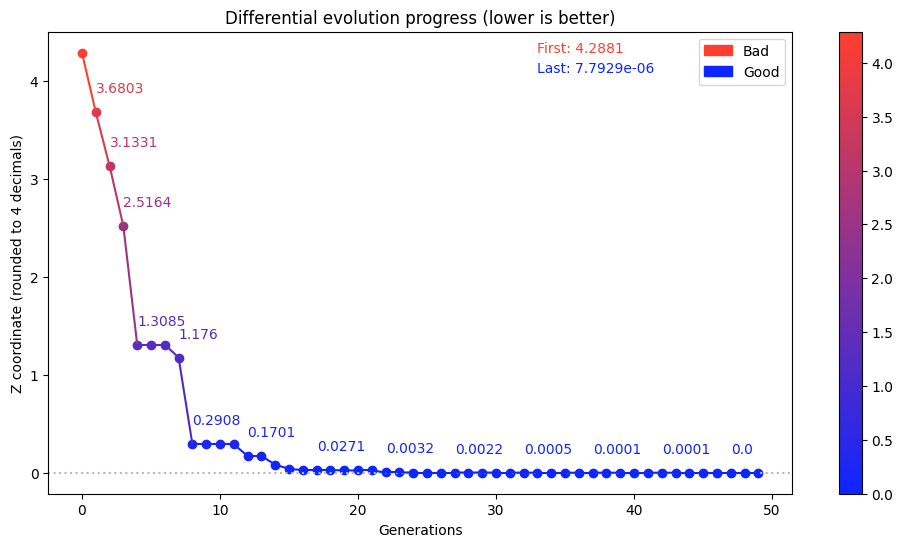

In [11]:
# Initialize plot with data
plot_2 = classes.PlotLine(de_all)

# Show plot
plot_2.show()

In [12]:
pyplot.show()